In [ ]:
!python --version

Python 3.10.12


In [ ]:
import pandas as pd

caminho = ''
caminho_desafio = ''

In [ ]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = 'ggplot2'

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pickle

# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
dados = pd.read_csv(caminho)

In [ ]:
dados.head(10)

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
5,24,solteiro (a),medio,nao,174,sim,487,1,sim
6,53,casado (a),superior,nao,4446,nao,429,1,nao
7,30,casado (a),medio,nao,946,nao,1065,1,nao
8,39,casado (a),fundamental,nao,879,nao,102,2,nao
9,30,divorciado (a),medio,nao,-94,nao,41,2,nao


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [ ]:
px.histogram(dados, x='aderencia_investimento', text_auto=True)

In [ ]:
px.histogram(dados, x='estado_civil', text_auto=True,
             color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(dados, x='escolaridade', text_auto=True,
             color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(dados, x='inadimplencia', text_auto=True,
             color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(dados, x='fez_emprestimo', text_auto=True,
             color='aderencia_investimento', barmode='group')

### Variáveis numéricas

In [ ]:
px.box(dados, x='idade', color='aderencia_investimento')

In [ ]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [ ]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [ ]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

# Desafios 1

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

In [ ]:
dados_desafio = pd.read_csv(caminho_desafio)

In [ ]:
dados_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
dados_desafio = dados_desafio.drop(columns='id_cliente', axis='columns')

In [ ]:
dados_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   score_credito        10000 non-null  int64  
 1   pais                 10000 non-null  object 
 2   sexo_biologico       10000 non-null  object 
 3   idade                10000 non-null  int64  
 4   anos_de_cliente      10000 non-null  int64  
 5   saldo                10000 non-null  float64
 6   servicos_adquiridos  10000 non-null  int64  
 7   tem_cartao_credito   10000 non-null  int64  
 8   membro_ativo         10000 non-null  int64  
 9   salario_estimado     10000 non-null  float64
 10  churn                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
dados_desafio.head(10)

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
5,645,Espanha,Homem,44,8,113755.78,2,1,0,149756.71,1
6,822,França,Homem,50,7,0.00,2,1,1,10062.80,0
7,376,Alemanha,Mulher,29,4,115046.74,4,1,0,119346.88,1
8,501,França,Homem,44,4,142051.07,2,0,1,74940.50,0
9,684,França,Homem,27,2,134603.88,1,1,1,71725.73,0


### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [ ]:
px.pie(dados_desafio, names='churn')

In [ ]:
px.histogram(dados_desafio, x='pais', text_auto=True,
             color='churn', barmode='group')

In [ ]:
px.histogram(dados_desafio, x='sexo_biologico',
             text_auto=True, color='churn', barmode='group')

In [ ]:
px.histogram(dados_desafio, x='tem_cartao_credito',
             text_auto=True, color='churn', barmode='group')

In [ ]:
px.histogram(dados_desafio, x='membro_ativo',
             text_auto=True, color='churn', barmode='group')

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [ ]:
px.box(dados_desafio, x='score_credito', color='churn')

In [ ]:
px.box(dados_desafio, x='idade', color='churn')

In [ ]:
px.box(dados_desafio, x='anos_de_cliente', color='churn')

In [ ]:
px.box(dados_desafio, x='saldo', color='churn')

In [ ]:
px.box(dados_desafio, x='servicos_adquiridos', color='churn')

In [ ]:
px.box(dados_desafio, x='salario_estimado', color='churn')

# Transformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [ ]:
x = dados.drop(columns='aderencia_investimento', axis='columns')

In [ ]:
y = dados['aderencia_investimento']

## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

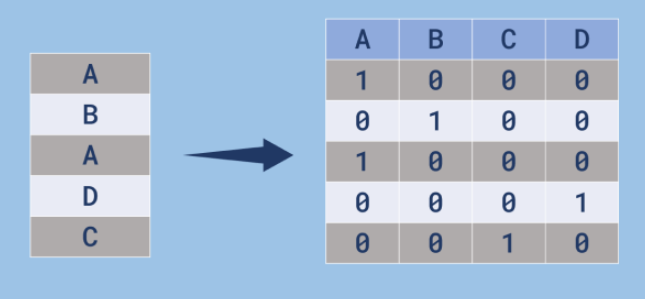

Existe uma forma bem simples de fazer essa transformação usando a biblioteca pandas, a partir da função pd.get_dummies(), porém não é uma maneira muito recomendada quando estamos trabalhando com Machine Learning, uma vez que essa função não consegue abstrair e executar a mesma transformação para um novo dado. Caso você tenha uma nova informação que pertence apenas a uma das classes de uma variável alvo, o processo do get_dummies não será capaz de gerar as outras colunas provenientes das outras classes. Isso torna um problema para o modelo, uma vez que ele espera todas as características para realizar uma previsão.

O método mais recomendado para realizar a transformação em projetos de Machine Learning é o OneHotEnconder. Em um primeiro momento, com os dados iniciais, ele inicia a sua ação compreendendo as características dos dados e gera as novas colunas para cada classe. Além disso, armazena a regra capaz de fazer esse procedimento para novos dados. Portanto, no processo de transformação de um novo dado, ele consegue criar todas as colunas necessárias, por mais que esse novo dado tenha apenas a informação de uma das classes.

In [ ]:
display(x['estado_civil'].unique())
display(x['escolaridade'].unique())
display(x['inadimplencia'].unique())
display(x['fez_emprestimo'].unique())

array(['casado (a)', 'solteiro (a)', 'divorciado (a)'], dtype=object)

array(['superior', 'medio', 'fundamental'], dtype=object)

array(['nao', 'sim'], dtype=object)

array(['nao', 'sim'], dtype=object)

In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), [
                                  'estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']), remainder='passthrough', sparse_threshold=0)

In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [ ]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

# Desafios 2

### Desafio 1:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [ ]:
x_desafio = dados_desafio.drop('churn', axis='columns')

In [ ]:
y_desafio = dados_desafio['churn']

### Desafio 2:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [ ]:
x_desafio.columns

Index(['score_credito', 'pais', 'sexo_biologico', 'idade', 'anos_de_cliente',
       'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo',
       'salario_estimado'],
      dtype='object')

In [ ]:
display(x_desafio['pais'].unique())
display(x_desafio['sexo_biologico'].unique())
display(x_desafio['tem_cartao_credito'].unique())
display(x_desafio['membro_ativo'].unique())

array(['França', 'Espanha', 'Alemanha'], dtype=object)

array(['Mulher', 'Homem'], dtype=object)

array([1, 0])

array([1, 0])

In [ ]:
one_hot_desafio = make_column_transformer((OneHotEncoder(drop='if_binary'), [
                                          'pais', 'sexo_biologico', 'tem_cartao_credito', 'membro_ativo']), remainder='passthrough', sparse_threshold=0)

In [ ]:
x_desafio = one_hot_desafio.fit_transform(x_desafio)

### Desafio 3:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [ ]:
label_encoder_desafio = LabelEncoder()

In [ ]:
y_desafio = label_encoder_desafio.fit_transform(y_desafio)

# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de **treinamento** são usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

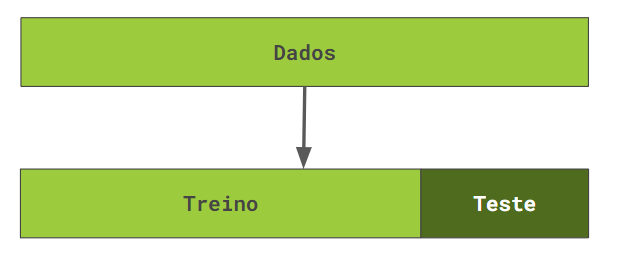

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y, stratify=y, random_state=5)

Existem dois conceitos que estão muito ligados a essa divisão dos dados e que são muito relevantes nos projetos de machine learning: o overfitting e underfitting.

**Overfitting (Sobreajuste)**:

O overfitting ocorre quando um modelo se ajusta demais aos dados de treinamento. Isso indica que o modelo capturou não só o padrão dos dados, mas também ruídos e variações aleatórias que estão presentes nos dados usados para treinamento. Como resultado disso, o modelo tem um resultado muito bom ao ser avaliado com os dados de treinamento, porém seu desempenho nos dados de teste ou em dados novos cai consideravelmente.

Características do overfitting:

* Erro muito baixo nas predições em dados de treinamento;
* Erro muito alto nas predições em dados de teste;
* Modelo muito complexo que tenta memorizar os dados de treinamento ao invés de aprender o padrão dos dados.

**Underfitting (Subajuste)**:

O underfitting ocorre quando um modelo é muito simples e não consegue capturar o padrão presente nos dados. Isso indica que o modelo não foi capaz de aprender os relacionamentos existentes nos dados de treinamento e acaba tendo um desempenho ruim tanto em dados de treinamento quanto de teste.

Características do underfitting:

* Erro muito alto nas predições em dados de treinamento;
* Erro muito alto nas predições em dados de teste;
* Modelo muito simples que não consegue representar bem os dados.

🤖 Em um contexto de machine learning, ruído refere-se a informações irrelevantes, aleatórias ou imprecisas presentes nos dados de treinamento. Esses ruídos podem ser causados por uma variedade de fatores, como erros de medição, dados corrompidos, amostras atípicas ou até mesmo inconsistências nos dados coletados.

🤖 Quando um modelo de machine learning é exposto a ruídos excessivos durante o treinamento, ele pode aprender padrões falsos ou irrelevantes, resultando em um fenômeno conhecido como overfitting.

O objetivo principal da criação de modelos de machine learning é encontrar um equilíbrio entre o overfitting e underfitting, para que tenha um ajuste adequado. Um modelo bem ajustado é capaz de aprender o padrão dos dados e generalizar para novos dados, fazendo predições com consistência sem que seja muito influenciado pelos ruídos presentes nos dados de treinamento.

## Modelo de base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.6025236593059937

## Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [ ]:
árvore = DecisionTreeClassifier(random_state=5)
árvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
árvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
árvore.score(x_teste, y_teste)

0.6656151419558359

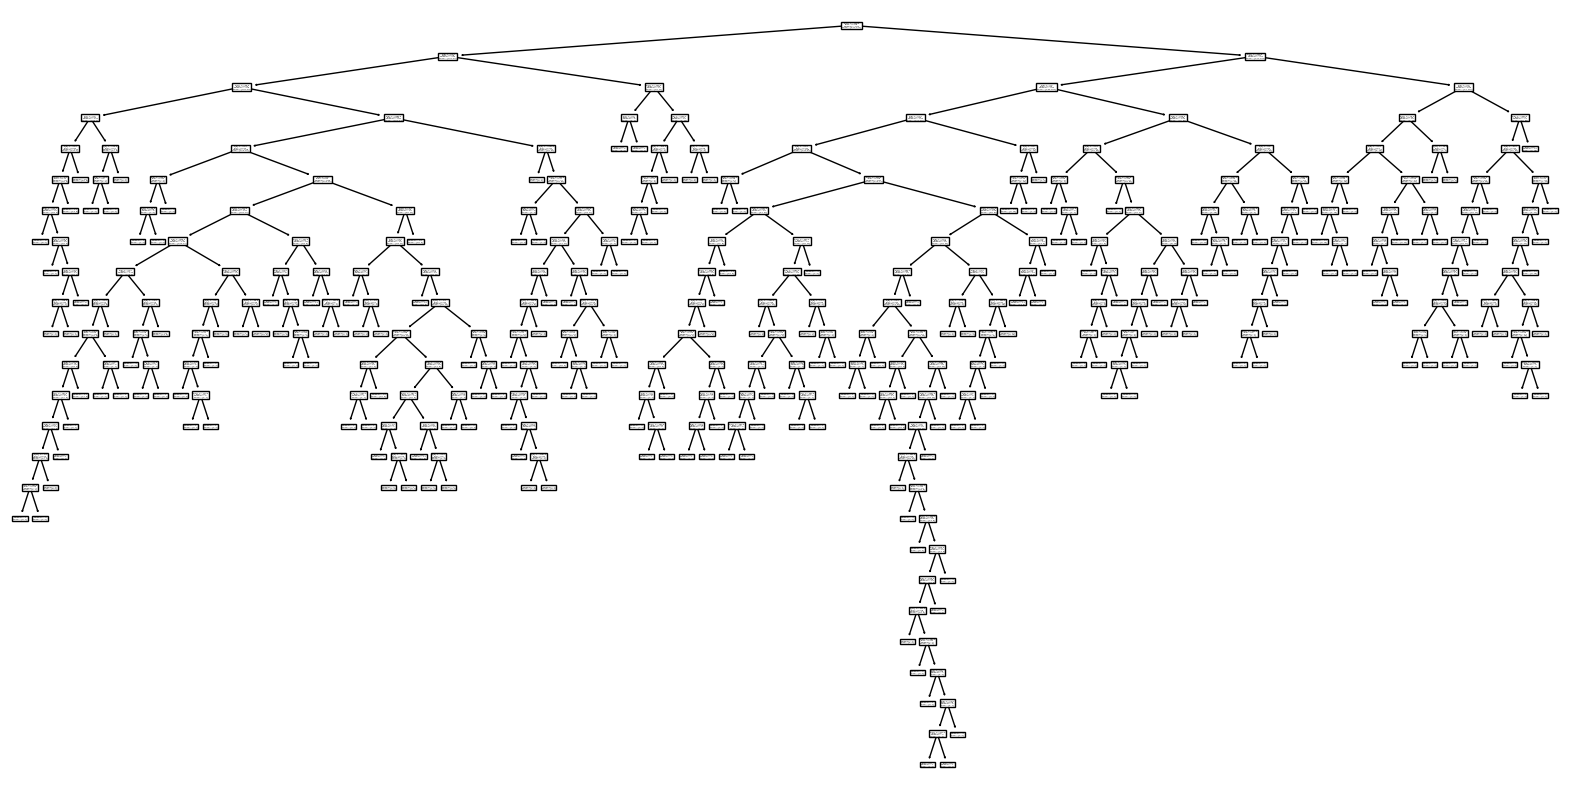

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(árvore)

In [ ]:
# overfitting
árvore.score(x_treino, y_treino)

1.0

In [ ]:
# podando a árvore com max_depth
árvore = DecisionTreeClassifier(random_state=5, max_depth=3)
árvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
árvore.score(x_treino, y_treino)

0.7613038906414301

In [ ]:
árvore.score(x_teste, y_teste)

0.7160883280757098

In [ ]:
_ = ['casado (a)',
     'divorciado (a)',
     'solteiro (a)',
     'fundamental',
     'medio',
     'superior',
     'inadimplencia',
     'fez_emprestimo',
     'idade',
     'saldo',
     'tempo_ult_contato',
     'numero_contatos']

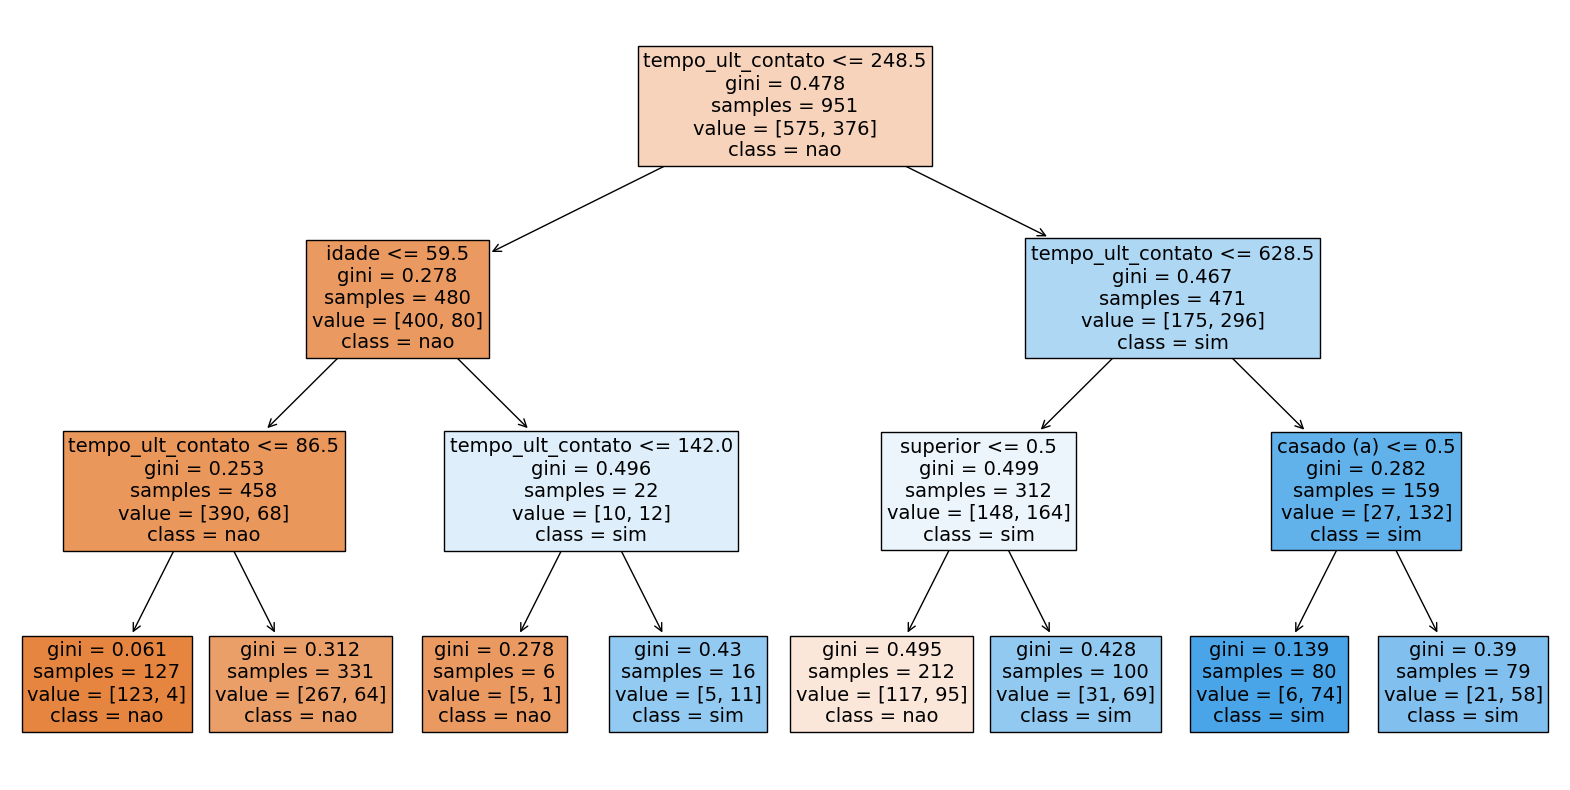

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(árvore, filled=True, class_names=[
          'nao', 'sim'], feature_names=_, fontsize=14)

# Desafios 3

### Desafio 1:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [ ]:
x_treino_desafio, x_teste_desafio, y_treino_desafio, y_teste_desafio = train_test_split(
    x_desafio, y_desafio, stratify=y_desafio, random_state=5)

### Desafio 2:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [ ]:
dummy_desafio = DummyClassifier()
dummy_desafio.fit(x_treino_desafio, y_treino_desafio)
dummy_desafio.score(x_teste_desafio, y_teste_desafio)

0.7964

### Desafio 3:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [ ]:
árvore_desafio = DecisionTreeClassifier(random_state=5, max_depth=4)
árvore_desafio.fit(x_treino_desafio, y_treino_desafio)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
árvore_desafio.score(x_treino_desafio, y_treino_desafio)

0.8509333333333333

In [ ]:
árvore_desafio.score(x_teste_desafio, y_teste_desafio)

0.8464

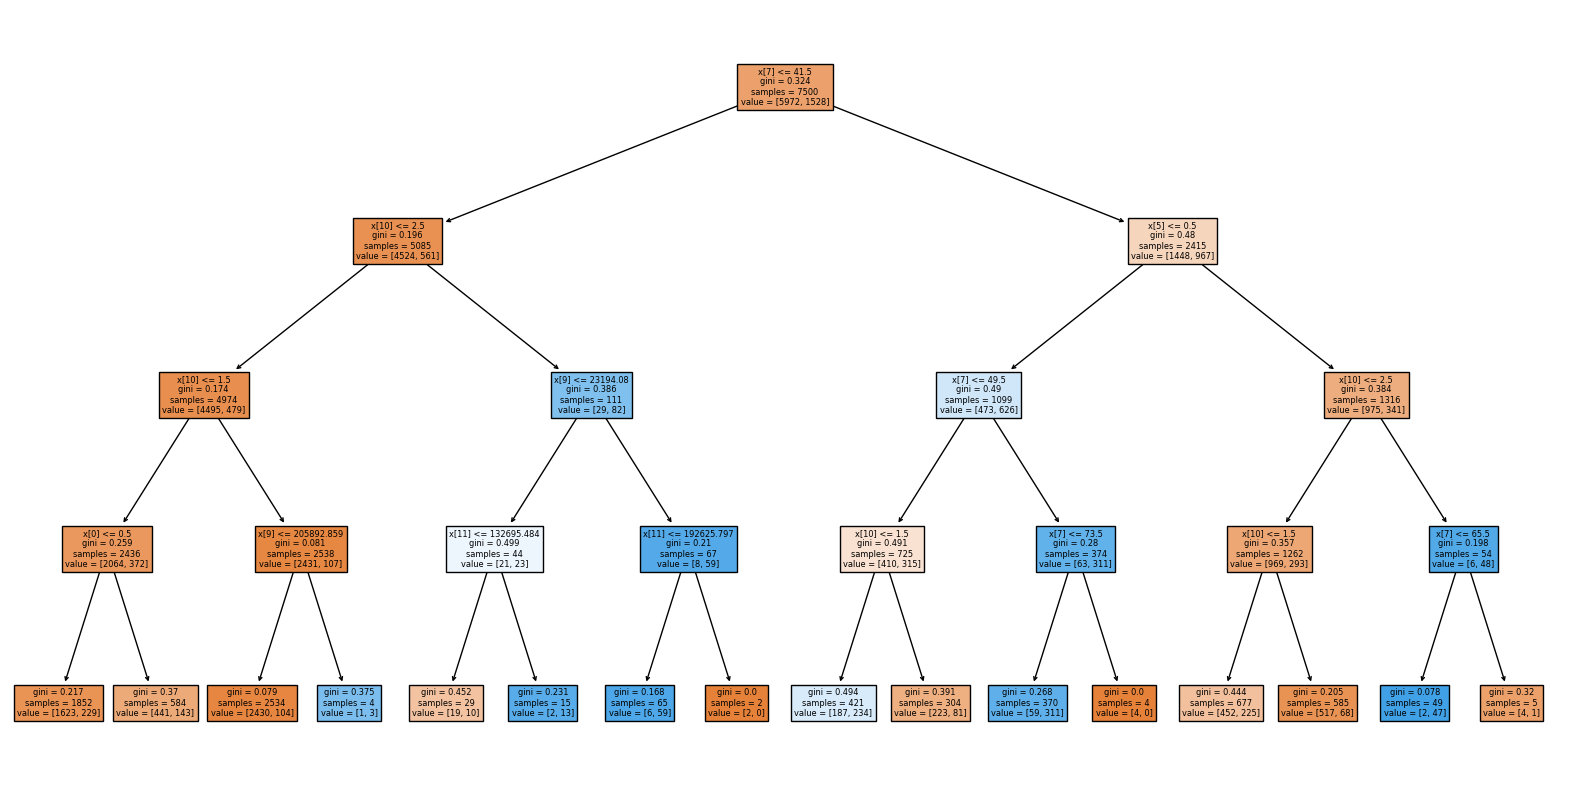

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(árvore_desafio, filled=True)

# Seleção de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas **idade** e **salário**, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [ ]:
normalização = MinMaxScaler()
x_treino_normalizado = normalização.fit_transform(x_treino)

In [ ]:
pd.DataFrame(x_treino_normalizado).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.046147,0.176556,0.000000
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.161765,0.028859,0.155572,0.000000
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220588,0.042810,0.057164,0.032258
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.128394,0.045224,0.000000
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.338235,0.081147,0.342258,0.064516


## KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [ ]:
# sem fit
x_teste_normalizado = normalização.transform(x_teste)

In [ ]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

## Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.

Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

In [ ]:
f'acurácia dummy: {dummy.score(x_teste, y_teste)}'

'acurácia dummy: 0.6025236593059937'

In [ ]:
f'acurácia dummy normalizado: {dummy.score(x_teste_normalizado, y_teste)}'

'acurácia dummy normalizado: 0.6025236593059937'

In [ ]:
f'acurácia árvore: {árvore.score(x_teste, y_teste)}'

'acurácia árvore: 0.7160883280757098'

In [ ]:
f'acurácia árvore normalizado: {árvore.score(x_teste_normalizado, y_teste)}'

'acurácia árvore normalizado: 0.6025236593059937'

In [ ]:
f'acurácia knn: {knn.score(x_teste_normalizado, y_teste)}'

'acurácia knn: 0.6876971608832808'

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as a:
  pickle.dump(one_hot, a)

In [ ]:
!ls

classificacao-churn.csv			  modelo_árvore.pkl	sample_data
classificacao-marketing-investimento.csv  modelo_onehotenc.pkl


In [ ]:
with open('modelo_árvore.pkl', 'wb') as a:
  pickle.dump(árvore, a)

In [ ]:
!ls

classificacao-churn.csv			  modelo_árvore.pkl	sample_data
classificacao-marketing-investimento.csv  modelo_onehotenc.pkl


## Testando o melhor modelo com uma entrada inédita

In [ ]:
dados.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [ ]:
novo_dado = {'idade': [45],
             'estado_civil': ['solteiro (a)'],
             'escolaridade': ['superior'],
             'inadimplencia': ['nao'],
             'saldo': [23040],
             'fez_emprestimo': ['nao'],
             'tempo_ult_contato': [800],
             'numero_contatos': [4]}

In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [ ]:
modelo_onehotenc = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_árvore = pd.read_pickle('/content/modelo_árvore.pkl')

In [ ]:
novo_dado = modelo_onehotenc.transform(novo_dado)
novo_dado

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 4.500e+01, 2.304e+04, 8.000e+02, 4.000e+00]])

In [ ]:
modelo_árvore.predict(novo_dado)

array([1])

Com base no nosso modelo de árvore de decisão, esse cliente aderirá ao investimento.

# Desafios 4

### Desafio 1:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [ ]:
normalização = MinMaxScaler()
x_treino_desafio_normalizado = normalização.fit_transform(x_treino_desafio)

In [ ]:
pd.DataFrame(x_treino_desafio_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,1.0,0.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,0.0,0.0,1.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,0.0,0.0,1.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,0.0,1.0,0.0,1.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,0.0,1.0,0.0,1.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,0.0,1.0,0.0,1.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,0.0,0.0,1.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


### Desafio 2:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [ ]:
knn_desafio = KNeighborsClassifier()
knn_desafio.fit(x_treino_desafio_normalizado, y_treino_desafio)

KNeighborsClassifier()

In [ ]:
x_teste_desafio_normalizado = normalização.transform(x_teste_desafio)

In [ ]:
knn_desafio.score(x_teste_desafio_normalizado, y_teste_desafio)

0.8172

### Desafio 3:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [ ]:
print(f'Acurácia Dummy Desafio: {
      dummy_desafio.score(x_teste_desafio, y_teste_desafio)}')

Acurácia Dummy Desafio: 0.7964


In [ ]:
print(f'Acurácia Árvore Desafio: {
      árvore_desafio.score(x_teste_desafio, y_teste_desafio)}')

Acurácia Árvore Desafio: 0.8464


In [ ]:
print(f'Acurácia KNN Desafio: {knn_desafio.score(
    x_teste_desafio_normalizado, y_teste_desafio)}')

Acurácia KNN Desafio: 0.8172
